### Logistic Regression Classifier

Logistic Regression is a common classification algorithm. Python’s scikit-learn library provides the easy-to-use and efficient `LogisticRegression` class.

If you interest about formula derivation of logistic regression, you can get more detail from [this](https://github.com/hengbinxu/Machine-Learning-from-Scratch/blob/master/Logistic%20Regression.ipynb).

#### Use pima-indians.data file as our demonstration dataset.([download from here](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv)).

#### Data Description

 1. Pregnant (Number of times pregnant)
 2. Plg (Plasma glucose concentration a 2 hours in an oral glucose tolerance test)
 3. BP (Diastolic blood pressure (mm Hg))
 4. TSFT (Triceps skin fold thickness (mm))
 5. SI (2-Hour serum insulin (mu U/ml))
 6. BMI (Body mass index (weight in kg/(height in m)^2))
 7. DP (Diabetes pedigree function)
 8. Age (years)
 9. Class variable (0 or 1)

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
from sklearn import metrics
import seaborn as sns

In [42]:
dat_names = ["Pregnant", "Plg", "BP", "TSFT", "SI", "BMI", "DP","Age", "Class"]

df = pd.read_csv('data\\Pima_indians.txt', sep = ',', header = None)
df.columns = dat_names
df.head(3)

,Pregnant,Plg,BP,TSFT,SI,BMI,DP,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


### Pair Scatter Plot

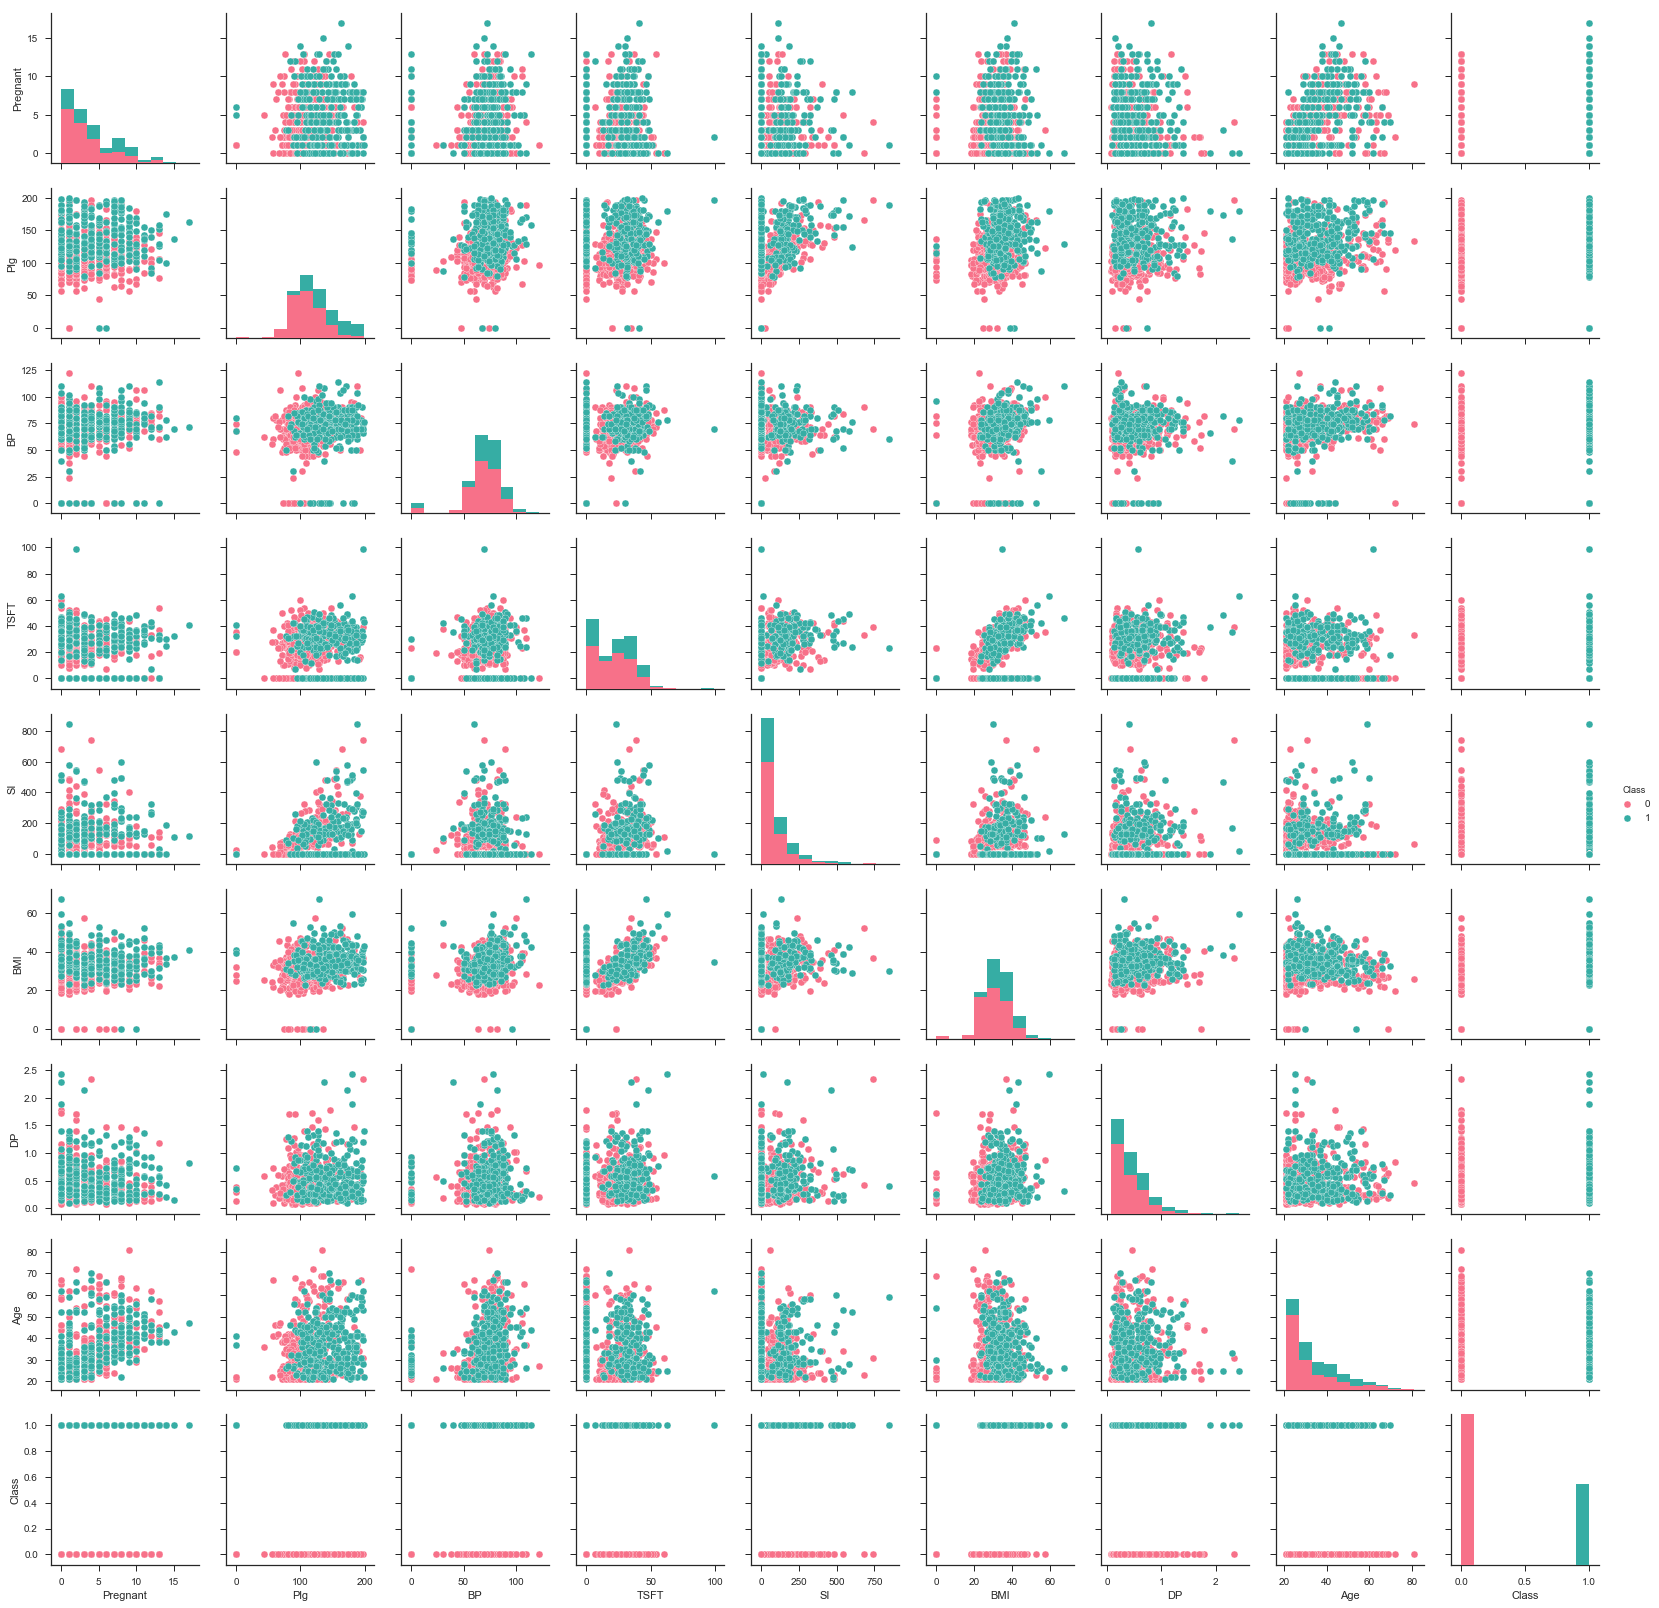

In [43]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data = df, hue = "Class", palette = "husl")
plt.show()

### Correlation Analysis

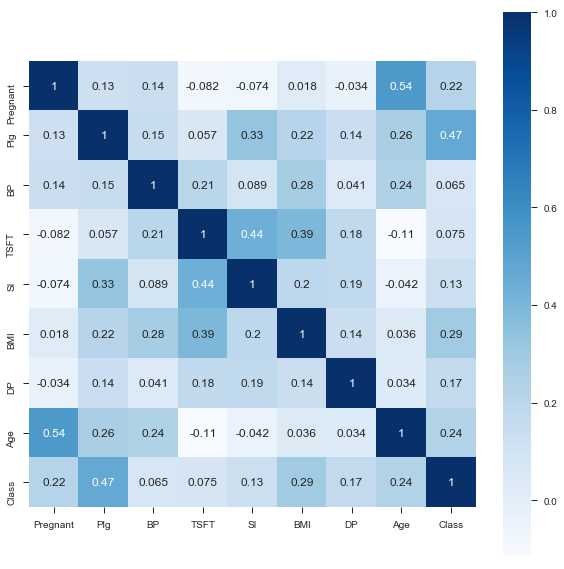

In [44]:
corr_matrix = df.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(data = corr_matrix, annot =  True, square = True, cmap = plt.cm.Blues)
plt.show()

### Feature Standardlization(by Sklearn.preprocessing.StandardScaler)

In [45]:
sc = StandardScaler()
sc.fit(df.loc[:, ["Plg", "BP", "TSFT", "SI", "BMI", "DP"]])
df.loc[:, ["Plg", "BP", "TSFT", "SI", "BMI", "DP"]] = sc.fit_transform(df.loc[:, ["Plg", "BP", "TSFT", "SI", "BMI", "DP"]])
df.head(3)

,Pregnant,Plg,BP,TSFT,SI,BMI,DP,Age,Class
0,6,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,50,1
1,1,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,31,0
2,8,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,32,1


### Feature Standardlization(by apply function)

In [40]:
def stand(x):
    return (x - x.mean())/x.std()

df.loc[:, ["Plg", "BP", "TSFT", "SI", "BMI", "DP"]] = df.loc[:, ["Plg", "BP", "TSFT", "SI", "BMI", "DP"]].apply(stand)
df.head(3)

,Pregnant,Plg,BP,TSFT,SI,BMI,DP,Age,Class
0,6,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,50,1
1,1,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,31,0
2,8,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,32,1


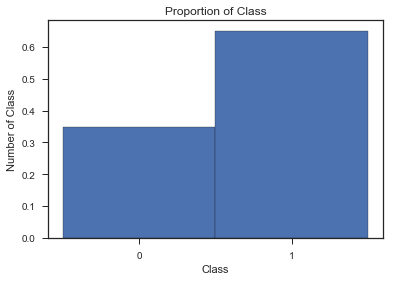

In [46]:
class_num = np.array([sum(df['Class'] == 1)/len(df["Class"]), sum(df['Class'] == 0)/len(df["Class"])])

plt.bar(x = range(len(class_num)), height = class_num, edgecolor = 'k', width = 1)
plt.xticks([0, 1])
plt.xlabel(s = 'Class')
plt.ylabel("Number of Class")
plt.title("Proportion of Class")
plt.show()

Accroding the above plot, we know that the dataset is unbalanced, so we need to adjust it. 

Unbalanced dataset will affect learning process, it will cause the classifier to prefer the larger number of class.

There are two common kinds of method to adjust it:
 1. Oversampling
 2. Undersampling

### Undersampling

In [47]:
np.random.seed(seed = 123)

c0_index = df[df['Class'] == 0].index
total_c1 = sum(df['Class'] == 1)

sel_index = np.random.choice(c0_index, size = total_c1, replace = False)

c0_df = df.iloc[sel_index, :]
c1_df = df[df['Class'] == 1]

trans_df = pd.concat([c0_df, c1_df], axis = 0).reset_index(drop = True)

c0_complement = df[df['Class'] == 0].drop(index = sel_index).reset_index(drop = True)

### Partition Training Set and Testing Set

In [48]:
def train_test_sep(data, target, training_ratio):
    sample_number = np.ceil(data.shape[0]*training_ratio).astype(np.int64)
    sel_index = np.random.choice(a = data.index, size = sample_number, replace = False)
    training = data.iloc[sel_index, :]
    testing = data.drop(index = sel_index)
    x_train, x_test, y_train, y_test = training.drop(columns = target), testing.drop(columns = target), training[target], testing[target]
    return x_train, x_test, y_train, y_test

In [49]:
x_train, x_test, y_train, y_test = train_test_sep(data = trans_df, target = 'Class', training_ratio = 0.8)

x_test = pd.concat([x_test, c0_complement.drop(columns = 'Class')], axis = 0)
y_test = np.concatenate((y_test, c0_complement['Class']), axis = 0)

print("Number of Trainig set : ", x_train.shape[0])
print("Number of Testing set : ", x_test.shape[0])

Number of Trainig set :  429
Number of Testing set :  339


### Logistic Regression
### [參數說明](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html):

 - penalty(懲罰項種類, L1 norm 和 L2 norm)
 - tol (演算法停止的容忍度，gradient若小於設定值則停止更新權重)
 - C (Inverse of regularization strength,懲罰項的強度，愈小表示懲罰項愈強)
 - class_weight (default: None, 若輸入為 balanced，則會調整樣本的權重，與每個類別佔總樣本數的百分比成反比)

In [10]:
lr = LogisticRegression(penalty = 'l2', C = 0.5)
lr.fit(X = x_train, y = y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
print("coefficient: {}".format(lr.coef_))
print("Intercept:{}".format(lr.intercept_))

coefficient: [[ 0.15758913  1.32183967 -0.3419209   0.05158185 -0.18517922  0.63005145
   0.26227005 -0.00661841]]
Intercept:[-0.58641028]


### Hypothesis Testing 
#### Test model coeffieient whether significantly larger than 0.

$\left\{ \begin{array}{ll}
        H_{0}: \beta = 0 \\
        H_{1}: \beta \neq 0 \end{array} \right.$
        
  - Decision rule: If P-value < significance level, then reject $H_{0}$
  
  

In [12]:
print("P-value: {}".format(f_regression(X = x_train, y = y_train)[1]))

df.columns[np.where(f_regression(X = x_train, y = y_train)[1] > 0.05)]

P-value: [1.59078611e-06 1.17996740e-30 3.92384534e-01 4.61931615e-02
 3.91589617e-03 1.42296266e-09 4.55915945e-03 1.51487973e-04]


Index(['BP'], dtype='object')

In [13]:
prediction = lr.predict(X = x_test)

In [14]:
print("Accuracy: {0:.3f} %".format(lr.score(X = x_test, y = y_test)*100))
#print("Accuracy: {0:.3f} %".format(metrics.accuracy_score(y_true = y_test, y_pred = prediction)*100))

Accuracy: 74.926 %


In [15]:
print(metrics.classification_report(y_true = y_test, y_pred = prediction))

             precision    recall  f1-score   support

          0       0.93      0.76      0.83       284
          1       0.36      0.71      0.48        55

avg / total       0.84      0.75      0.78       339



### Remove variable BP

In [16]:
new_x_train = x_train.drop(columns = 'BP')
new_x_test = x_test.drop(columns = "BP")

In [17]:
lr = LogisticRegression(penalty = 'l2', C = 0.5)
lr.fit(X = new_x_train, y = y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
print("coefficient: {}".format(lr.coef_))
print("Intercept:{}".format(lr.intercept_))

coefficient: [[ 1.50063002e-01  1.30021434e+00  2.81679029e-04 -1.70980673e-01
   5.57511693e-01  2.59890346e-01 -1.10936694e-02]]
Intercept:[-0.41767085]


In [19]:
print("P-value: {}".format(f_regression(X = new_x_train, y = y_train)[1]))

df.columns[np.where(f_regression(X = new_x_train, y = y_train)[1] > 0.05)]

P-value: [1.59078611e-06 1.17996740e-30 4.61931615e-02 3.91589617e-03
 1.42296266e-09 4.55915945e-03 1.51487973e-04]


Index([], dtype='object')

In [20]:
prediction = lr.predict(X = new_x_test)

In [21]:
print("Accuracy: {0:.3f} %".format(lr.score(X = new_x_test, y = y_test)*100))

Accuracy: 74.041 %


In [22]:
print(metrics.classification_report(y_true = y_test, y_pred = prediction))

             precision    recall  f1-score   support

          0       0.92      0.76      0.83       284
          1       0.34      0.65      0.45        55

avg / total       0.83      0.74      0.77       339



#### The 'balanced' mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x = df.drop(columns = 'Class')
y = df["Class"]

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [25]:
lr = LogisticRegression(penalty = "l2", fit_intercept = True, C = 0.5, class_weight = "balanced")
lr.fit(X = x_train, y = y_train)

LogisticRegression(C=0.5, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [26]:
prediction = lr.predict(X = x_test)

In [27]:
print("P-value: {}".format(f_regression(X = x_train, y = y_train)[1]))

names = df.columns[np.where(f_regression(X = x_train, y = y_train)[1] > 0.05)]
print("Variable {} larger than 0.05".format(names.get_values()))

P-value: [8.92593961e-08 4.32245413e-30 1.48391576e-01 1.41585465e-01
 4.42582788e-03 1.00469488e-12 1.05414892e-03 8.81275512e-10]
Variable ['BP' 'TSFT'] larger than 0.05


In [28]:
print("Accuracy: {0:.3f}%".format(lr.score(X = x_test, y = y_test)*100))

Accuracy: 77.604%


In [29]:
print(metrics.classification_report(y_true = y_test, y_pred = prediction))

             precision    recall  f1-score   support

          0       0.84      0.80      0.82       122
          1       0.68      0.74      0.71        70

avg / total       0.78      0.78      0.78       192



### Remove variable BP  and TSFT

In [32]:
new_x_train = x_train.drop(columns = ["BP", "TSFT"])
new_x_test = x_test.drop(columns = ["BP", "TSFT"])

In [35]:
lr = LogisticRegression(penalty = 'l2', C = 0.5, fit_intercept = True, class_weight = 'balanced')
lr.fit(X = new_x_train, y = y_train)

LogisticRegression(C=0.5, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [36]:
prediction = lr.predict(X = new_x_test)

In [38]:
print("P-value: {}".format(f_regression(X = new_x_train, y = y_train)[1]))

names = df.columns[np.where(f_regression(X = new_x_train, y = y_train)[1] > 0.05)]
print("Variable {} larger than 0.05".format(names.get_values()))

P-value: [8.92593961e-08 4.32245413e-30 4.42582788e-03 1.00469488e-12
 1.05414892e-03 8.81275512e-10]
Variable [] larger than 0.05


In [39]:
print("Accuracy: {0:.3f}%".format(lr.score(X = new_x_test, y = y_test)*100))

Accuracy: 77.604%


In [40]:
print(metrics.classification_report(y_true = y_test, y_pred = prediction))

             precision    recall  f1-score   support

          0       0.86      0.78      0.82       122
          1       0.67      0.77      0.72        70

avg / total       0.79      0.78      0.78       192

